# Phasor Demo

Label(value='Phasor Demo', style=LabelStyle(font_weight='bold'))

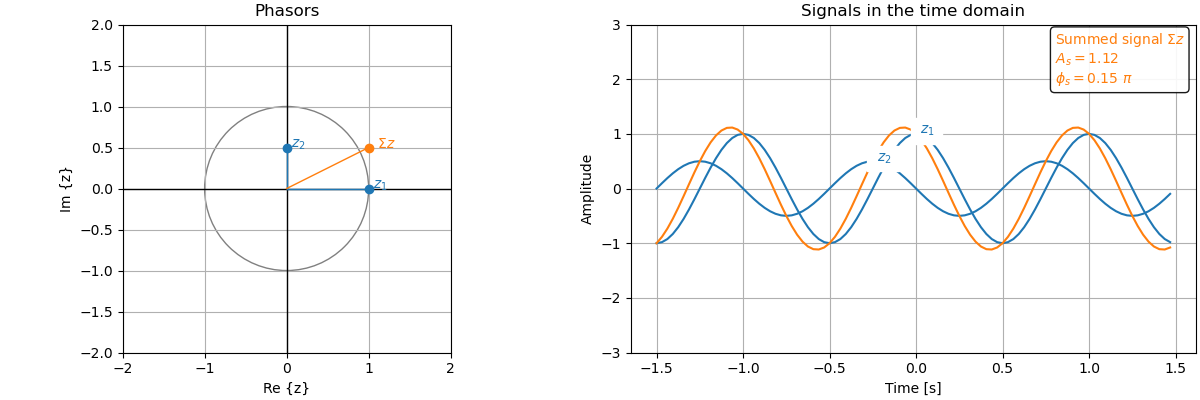

In [154]:
# Allow interactive figures in Matplotlig
%matplotlib ipympl

# Load external modules
from cmath import phase, rect
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

import zplot     # Phasor plotting module for DSP First, USN-course TSE2280

#  Function that runs the demo interactively
def run_phasordemo(A_1, A_2, phi_1, phi_2):
    """Set values and call plotting function."""
    z_1 = rect(A_1, pi*phi_1) 
    z_2 = rect(A_2, pi*phi_2) 
    zk = [z_1, z_2]

    # Remove olt plot
    for ax in [ax_phasor, ax_signal]:
        for art in list(ax.lines):
            art.remove()
        for art in list(ax.texts):
                art.remove()

    labels = [' $z_1$ ', ' $z_2$ ']
    zplot.plot_phasor(zk, labels=labels, include_sum=True, ax=ax_phasor)
    zplot.plot_signal(zk, labels=labels, include_sum=True, frequency=1, ax=ax_signal)

    ax_phasor.set(xlim=[-2, 2], ylim=[-2, 2])
    ax_signal.set(ylim=[-3, 3])

    zs = z_1 + z_2
    textstr = '\n'.join([r'Summed signal $\Sigma z$',
                         rf'$A_s= {abs(zs):.2f}$',
                         rf'$\phi_s = {phase(zs)/pi:.2f}$ $\pi$']) 

    ax_signal.text(0.75, 0.98, textstr, 
                 transform=ax_signal.transAxes,
                 verticalalignment='top', 
                 color="C1",
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.90))
    
    return


# Initialise result graph
plt.close('all')
plt.rc('font', size=10)          # Default text sizes
fig = plt.figure(figsize=[12, 4],
                 constrained_layout=True,
                 num="Phasor Demo")
ax_phasor = fig.add_subplot(1, 2, 1)
ax_signal = fig.add_subplot(1, 2, 2)

# Define widgets to operate program
widget_style = dict(description_width='initial')

label = [r"$z_1$", r"$z_2$"]
label_widget = [widgets.Label(labeltext,
                              layout=widgets.Layout(width='10%'), 
                              style=widget_style) 
                for labeltext in label]

A0 = [1.0, 0.5]
amplitude_widget = [widgets.FloatSlider(min=0.0, max=2.0, step=0.01, value=k, 
                                      description="Amplitude", 
                                      layout=widgets.Layout(width='40%'), 
                                      style=widget_style)
                    for k in A0]

phi0 = [0.0, 0.5]
phase_widget = [widgets.FloatSlider(min=-2, max=2, step=0.1, value=k, 
                                      description=r"Phase [$\pi$]", 
                                      readout_format='.2f',
                                      layout=widgets.Layout(width='40%'), 
                                      style=widget_style)
                    for k in phi0]

# Build list of widgets, display in a grid
widget_line = [] 
for k in [0, 1]:
    widget_line.append(widgets.HBox([label_widget[k], amplitude_widget[k], phase_widget[k]]))

amplitude_line = widgets.HBox([a for a in amplitude_widget])
phase_line = widgets.HBox([a for a in phase_widget])
widget_grid = widgets.VBox([amplitude_line, phase_line])

title_widget = widgets.Label("Phasor Demo", style=dict(font_weight='bold'))
display(title_widget)
display(widget_grid)

# Call display function interactively
w = widgets.interactive(run_phasordemo, 
                        A_1=amplitude_widget[0], phi_1=phase_widget[0],
                        A_2=amplitude_widget[1], phi_2=phase_widget[1])